<img src='images/gesis.png' style='height: 50px; float: left'>
<img src='images/social_comquant.png' style='height: 50px; float: left; margin-left: 40px'>

## Introduction to Computational Social Science methods with Python

# Session 8. Unsupervised machine learning

A dataset is a collection of values that are organized in two ways (observations and features). A feature contains all vallues that measure the same attribute (e.g., temparature) across all instances. In other words, feature froms a column. An observation contains all values measured on the same instance (e.g, city) across all attributes. In other words, it forms a row. All these obervational instances forms a table that is called feature matrix in machine learning. 

It has to be mentioned, that features (in machine learning) and varibles (in statistics) are the same concepts. Nevertheles, there is a difference, feature matrix has to contain the same type of data in every cell. The table can contain both types, categorical and continuous data but the first one has to be encoded.

Machine learning is a field that studies, develops and utilizes methods (and algorithms) that utilize data (feature matrix) to to improve performance on some set of tasks (Mitchell, 1997). In the simplified classification, machine learning can be divided into supervised and unsupervised learning (Figure 1). 

TODO: explain differences supervised and unsupervised 

|<img src='images/Machine_learning.svg' style='float: none; width: 640px'>|
|:--|
|<em style='float: center'>**Figure 1**: Machine learning structure</em>|

...

<div class='alert alert-block alert-success'>
<b>In this session</b>, 

you will learn differences between supervised and unsupervised learning. In Subsection **8.1** we will explain what dimentionality reduction is usefull for. The V-DEM dataset will function as an example that showcase usage of Principal Component Analysis (PCA) and how it related to Factor Analysis. (LDA?) In Subsection **8.2** you will learn how to perform clustering analysis on the example of K-Means algorithm. You will find out how to find optimal number of clusters. After finishing it you will be able to describe Agglomarative clustering and why to use it. In Subsection **8.3** you will be introduced to Association Rule mining  and ... Python packages. 
    
</div>

2-dimensional data paradigm: observations and features (variables)

Well-behaved (dense and balanced) vs. badly-behaved data (sparse, binary, and/or non-linear)

## 8.1. Dimensionality reduction

https://scikit-learn.org/stable/modules/decomposition.html#decompositions

Hovy textbook chapter 6





### 8.1.1. Structured data

Introduce Principal Component Analysis (PCA) using the VDEM dataset

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

Explain factor analysis and PCA in easy terms

Infer two factors and visualize them

How to interpret the results

Hovy chapter 6.3

caveats re PCA


Assumptions of factor analysis:
features are metric.
features are continious or ordinal
there is r>0.3 between the features 
sample is homogenous 

In [20]:
import pandas as pd

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
vdem = pd.read_csv('../data/V-Dem/V-Dem-CY-Core-v13_2019.csv', encoding='utf-8', low_memory=False)
#vdem = pd.read_csv('../data/V-Dem/V-Dem-CY-Full+Others-v10.csv', encoding='utf-8', low_memory=False)

#vdem = pd.read_csv('../data/V-Dem/V-Dem-CY-Core-v13.csv', encoding='utf-8', low_memory=False)
#vdem = vdem[vdem['year'] == 2019].reset_index(drop=True)
#vdem.head()
#vdem.to_csv('../data/V-Dem/V-Dem-CY-Core-v13_2019.csv', encoding='utf-8',index=False)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
vdem.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,...,v2xme_altinf_sd,v2xps_party,v2xps_party_codelow,v2xps_party_codehigh,v2x_divparctrl,v2x_feduni,v2xca_academ,v2xca_academ_codelow,v2xca_academ_codehigh,v2xca_academ_sd
0,Mexico,MEX,3,2019,2019-12-31,0,1,United Mexican States,1789,2022,...,0.655,0.867,0.739,0.933,-1.239,0.979,0.895,0.826,0.939,0.622
1,Suriname,SUR,4,2019,2019-12-31,0,0,Republic of Suriname [independent state],1900,2022,...,0.649,0.597,0.408,0.761,1.022,0.472,0.828,0.722,0.886,0.620
2,Sweden,SWE,5,2019,2019-12-31,0,1,Kingdom of Sweden,1789,2022,...,0.653,0.996,0.964,1.000,-0.003,0.941,0.951,0.907,0.972,0.618
3,Switzerland,CHE,6,2019,2019-12-31,0,1,Swiss Confederation,1798,2022,...,0.653,0.881,0.731,0.948,0.367,0.997,0.907,0.851,0.949,0.619
4,Ghana,GHA,7,2019,2019-12-31,0,0,Republic of Ghana,1902,2022,...,0.644,0.614,0.505,0.719,-1.380,0.169,0.793,0.682,0.860,0.623


old 

indicators = [
    'v2dlreason', 'v2dlcommon', 'v2dlcountr', 'v2dlconslt', 'v2dlengage', 
    'v2dlencmps', 'v2dlunivl', 'v2cseeorgs', 'v2csreprss', 'v2cscnsult', 
    'v2csprtcpt', 'v2csgender', 'v2csantimv', 'v2csrlgrep', 'v2csrlgcon', 
    'v2mecenefm', 'v2mecenefi', 'v2mecenefibin', 'v2mecrit', 'v2merange', 
    'v2mefemjrn', 'v2meharjrn', 'v2meslfcen', 'v2mebias', 'v2mecorrpt', 
    'v2exrescon', 'v2exbribe', 'v2exembez', 'v2excrptps', 'v2exthftps', 
    'v2cldiscm', 'v2cldiscw', 'v2clacfree', 'v2clrelig', 'v2clfmove'
]

In [23]:
indicators = [
    'v2mecenefm', 'v2meharjrn', 'v2meslfcen', 'v2mebias', 'v2merange', 'v2mecrit', 'v2cldiscm', 'v2cldiscw', 'v2clacfree',
    
    'v2psparban', 'v2psbars', 'v2psoppaut', 'v2elmulpar', 'v2cseeorgs', 'v2csreprss',
    'v2elsuffrage',
    'v2elembcap', 'v2elrgstry', 'v2elvotbuy', 'v2elirreg', 'v2elintim', 'v2elpeace', 'v2elfrfair',#'v2elembaut', 
    'v2lgbicam', 'v2expathhs', 'v2exhoshog','v2exdfcbhs','v2exdfdmhs',
    #'v2lginello','v2lgelecup','v2lginelup','v2expathhg','v2lgello',
   # 'v2mefemjrn'
]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
countries = vdem['country_name'].tolist()
vdem = vdem.set_index('country_name')[indicators]
vdem.shape

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(179, 28)

In [25]:
vdem.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,v2mecenefm,v2meharjrn,v2meslfcen,v2mebias,v2merange,v2mecrit,v2cldiscm,v2cldiscw,v2clacfree,v2psparban,...,v2elvotbuy,v2elirreg,v2elintim,v2elpeace,v2elfrfair,v2lgbicam,v2expathhs,v2exhoshog,v2exdfcbhs,v2exdfdmhs
country_name,,,,,,,,,,,,,,,,,,,,,
Mexico,0.100,0.232,0.844,1.435,1.528,1.628,2.663,1.372,1.800,1.950,...,-0.858,0.740,0.318,-0.990,1.294,2.0,7.0,1.0,1.310,1.654
Suriname,1.063,1.726,0.523,1.650,2.431,1.201,1.792,1.894,1.484,1.906,...,0.357,1.635,1.356,1.182,1.419,1.0,6.0,1.0,1.685,1.826
Sweden,3.400,2.127,2.011,2.316,2.682,3.194,1.936,1.988,3.303,2.427,...,2.447,1.270,1.987,1.449,2.073,1.0,4.0,0.0,-3.438,-3.511
Switzerland,3.185,3.714,3.061,2.697,2.118,2.395,2.590,2.896,3.008,2.461,...,2.251,2.152,1.770,0.864,1.877,2.0,6.0,1.0,-2.923,-3.565
Ghana,2.175,0.633,1.270,1.564,1.756,1.308,2.171,1.590,1.709,1.731,...,-0.777,0.560,0.395,-0.025,1.695,1.0,7.0,1.0,0.092,1.291


Are there missing values?

In [26]:
vdem.isna().sum().value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    20
9     7
3     1
dtype: int64

In [27]:
vdem[vdem.isna().any(axis=1)]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,v2mecenefm,v2meharjrn,v2meslfcen,v2mebias,v2merange,v2mecrit,v2cldiscm,v2cldiscw,v2clacfree,v2psparban,...,v2elvotbuy,v2elirreg,v2elintim,v2elpeace,v2elfrfair,v2lgbicam,v2expathhs,v2exhoshog,v2exdfcbhs,v2exdfdmhs
country_name,,,,,,,,,,,,,,,,,,,,,
Yemen,-2.238,-1.355,-0.593,-0.153,-0.613,-1.161,-0.917,-0.972,-1.652,1.033,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0.0,0.942,1.507
South Sudan,-2.690,-1.678,-0.359,-0.863,-1.677,-1.497,-1.939,-0.734,-1.530,1.032,...,NaN,NaN,NaN,NaN,NaN,2.0,7.0,1.0,1.190,1.524
Qatar,-0.983,-1.436,-1.924,-2.281,-2.143,-1.982,-1.340,-1.614,-0.405,-1.512,...,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0.0,2.349,1.623
China,-2.103,-1.826,-2.619,-1.751,-2.073,-2.062,-1.565,-1.365,-2.714,-3.080,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,1.011,0.761
Eritrea,-2.680,-2.803,-2.843,-2.685,-2.671,-2.208,-1.958,-2.273,-2.237,-3.381,...,NaN,NaN,NaN,NaN,NaN,0.0,6.0,1.0,1.035,1.950
Palestine/West Bank,-0.579,0.989,0.277,1.185,0.693,0.792,0.677,0.849,1.244,1.090,...,NaN,NaN,NaN,NaN,NaN,0.0,7.0,0.0,1.229,1.575
Somalia,-0.722,-0.223,-0.332,0.932,0.969,0.821,0.205,-0.186,-0.689,0.668,...,NaN,NaN,NaN,NaN,NaN,2.0,6.0,0.0,-1.583,-1.161
Palestine/Gaza,-0.967,-1.271,-1.838,-1.201,0.185,-1.120,-1.166,-1.726,-1.626,0.312,...,NaN,NaN,NaN,NaN,NaN,0.0,8.0,1.0,0.753,0.692
Oman,-0.976,-1.198,-1.732,-1.320,-1.929,-2.078,-0.634,-0.866,-0.681,-1.910,...,0.569,1.13,0.33,0.416,2.01,2.0,4.0,1.0,2.287,1.845


In [28]:
list_countries_na=vdem[vdem.isna().any(axis=1)].index.tolist()
vdem=vdem[~vdem.index.isin(list_countries_na)]
countries = vdem.index.tolist()
vdem.shape

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(169, 28)

In [29]:
vdem.isna().sum().value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    28
dtype: int64

How are the variables distributed?

In [30]:
vdem.loc[:, :].mean()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


v2mecenefm       0.704982
v2meharjrn       0.678580
v2meslfcen       0.668059
v2mebias         0.940988
v2merange        1.004633
v2mecrit         0.933917
v2cldiscm        1.072112
v2cldiscw        0.989828
v2clacfree       0.970787
v2psparban       1.183077
v2psbars         1.316491
v2psoppaut       1.236568
v2elmulpar       0.577876
v2cseeorgs       1.100355
v2csreprss       0.962598
v2elsuffrage    99.617870
v2elembcap       0.957391
v2elrgstry       0.715456
v2elvotbuy       0.004929
v2elirreg        0.111893
v2elintim        0.179740
v2elpeace        0.301976
v2elfrfair       0.220041
v2lgbicam        1.414201
v2expathhs       6.106509
v2exhoshog       0.355030
v2exdfcbhs       0.006882
v2exdfdmhs      -0.074189
dtype: float64

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
sns.set_theme(style='darkgrid')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


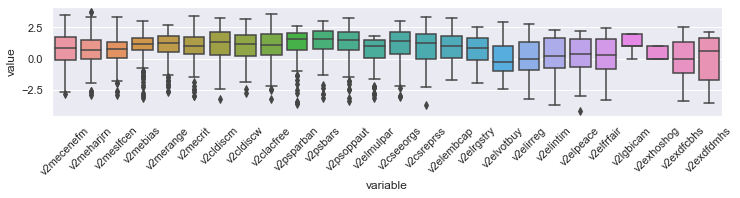

In [33]:
plt.figure(figsize=[12, 2])
sns.boxplot(
    x = 'variable', 
    y = 'value', 
    data = vdem.loc[:, ~vdem.columns.isin(['v2elsuffrage','v2expathhs'])].melt()#,'v2lgello','v2mefemjrn'
)
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='variable', ylabel='value'>

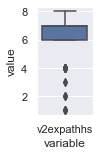

In [34]:
plt.figure(figsize=[1, 2])
sns.boxplot(
    x = 'variable', 
    y = 'value', 
    data = vdem.loc[:, vdem.columns.isin(['v2expathhs'])].melt()
)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='variable', ylabel='value'>

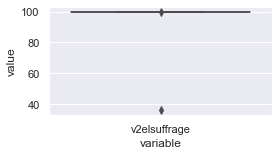

In [35]:
plt.figure(figsize=[4, 2])
sns.boxplot(
    x = 'variable', 
    y = 'value', 
    data = vdem.loc[:, vdem.columns.isin(['v2elsuffrage'])].melt()#'v2lgello'
)

In [36]:
X_vdem = vdem.to_numpy()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
from sklearn.preprocessing import StandardScaler

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
X_vdem = StandardScaler().fit_transform(X_vdem)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


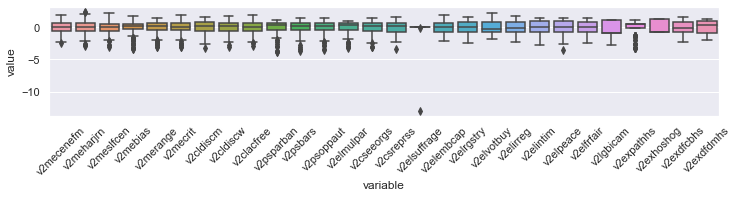

In [39]:
plt.figure(figsize=[12, 2])
sns.boxplot(
    x = 'variable', 
    y = 'value', 
    data = pd.DataFrame(data=X_vdem, columns=indicators).melt()
)
plt.xticks(rotation=45)
plt.show()

In [40]:
vdem_z=pd.DataFrame(data=X_vdem, columns=indicators,index=countries)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
vdem_z.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,v2mecenefm,v2meharjrn,v2meslfcen,v2mebias,v2merange,v2mecrit,v2cldiscm,v2cldiscw,v2clacfree,v2psparban,...,v2elvotbuy,v2elirreg,v2elintim,v2elpeace,v2elfrfair,v2lgbicam,v2expathhs,v2exhoshog,v2exdfcbhs,v2exdfdmhs
Mexico,-0.409599,-0.353126,0.145535,0.413101,0.433327,0.540235,1.181993,0.302050,0.587808,0.613223,...,-0.645696,0.431409,0.098918,-1.020694,0.713297,1.161255,0.551190,1.347838,0.848370,0.985447
Suriname,0.242393,0.828230,-0.119991,0.592888,1.180975,0.207882,0.534860,0.714613,0.363803,0.578041,...,0.263441,1.046131,0.841552,0.695241,0.796319,-0.821090,-0.065705,1.347838,1.092506,1.083525
Sweden,1.824642,1.145315,1.110859,1.149809,1.388793,1.759122,0.641849,0.788906,1.653245,0.994627,...,1.827306,0.795434,1.292999,0.906177,1.230690,-0.821090,-1.299495,-0.741929,-2.242723,-1.959736
Switzerland,1.679077,2.400209,1.979402,1.468408,0.921824,1.137225,1.127756,1.506544,1.444128,1.021813,...,1.680647,1.401227,1.137747,0.444013,1.100512,1.161255,-0.065705,1.347838,-1.907442,-1.990528
Ghana,0.995265,-0.036042,0.497916,0.520974,0.622102,0.291165,0.816449,0.474346,0.523300,0.438113,...,-0.585087,0.307778,0.154007,-0.258319,0.979632,-0.821090,0.551190,1.347838,0.055415,0.778457


<b>Factor Analysis</b>

In social sciences one deals a lot with abstract concepts that one can't directly observe and are difficult to measure empirically. For example, imagine we want to measure electoral democracies of given countries. Since electoral democracy is not a material thing, one can't look at country and measure phisically the amount of this democracy. In other words, this is a concept developed by political and social scientists and such a variable that represents it is called 'unobserved' or 'latent' variable (McLevey, 2022).    

In order to succied, we would need to find/develop measurement strategies and models that are transparently validated. First, we will need to develop conceptual and operational definition of electoral democracy. A conceptiual definition includes describing how abstarct concept relates to other concepts. It can be done by dividing it into more specific aspects/dimensions. Second, we would need to define operational definition that describes "specific operations that one would have to perform to generate empirical obeservations(i.e. data) for each of the various dimension."(MCLevey, 2022) These variables that are observed are called indicator variables.   

According to Coppedge et. al (2021), electoral democracy is divided into five concepts (Figure, 2):  
1) Freedom of expression,
2) Freedom of association,
3) Share of adults citizens with suffrage,
4) Officials are elected.

Where each of this concepts is composed of many other features (Figure 2, top-level). Since we have these observations for many countries in our dataset. Let us test this theoretical model of latent factors using factor analysis.

|<img src='images/Latent_variables.jpg' style='float: none; width: 640px'>|
|:--|
|<em style='float: center'>**Figure 2**: Latent variables - at the top are observable features... (MCLevey, 2022)</em>|

In broader sence, factor analysis objectives are 1) to reduce the number of features, 2) find latent variables. In other words, we will try to cluster features in a meaningful way. This can be achived by checking correlations between features and finding groups of features that are highly correlated between each other and are not correlated with leftover variables.  


We would need to import neccesary packages.

In [42]:
#!pip install factor-analyzer
# Instantiate factor analysis object
from factor_analyzer import FactorAnalyzer 
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ModuleNotFoundError: No module named 'factor_analyzer'

First, we would need to investigate our correlation matrix. For that perpose we would display correlation matrix as heatmap using seaborn package. Parameters xticklabels and  yticklabels we use in order to display all variables. 

In [ ]:
#c = pd.DataFrame(FactorAnalyzer(n_factors=vdem_z.shape[1]).fit(vdem_z).corr_,index=indicators,columns=indicators)
c = vdem_z.corr() #or you can calculate correlationmatrix using pandas
sns.heatmap(c,xticklabels=True, yticklabels=True); 

According to the plot we see 3 highly correlated groups. First fifteen variables, then from v2elembcap to v2elfrfair and last four.  

Should we drop some variables?

On this stage we can also remove variables that have low correlations. As a rule of thumb, we will drop variables with all correlations lower than 0.3. We will investigate values "v2elsuffrage","v2lgbicam","v2expathhs"

In [ ]:
c[["v2elsuffrage","v2lgbicam","v2expathhs"]]

Variables "v2elsuffrage" (percent of population with suffrage) and "v2lgbicam" (legislature bicameral) do not have even moderate correlations with outher variables. If we return back to Figure 2. We will see that in or theoretical model "Suffrage" is one separate indices that can contribute to Electoral democracy latent variable. 

We will remove both these variables from our model and thus decrease our model to 4 subgroups, i.e., factors. But before dong that we will perform two test: 
1) Bartlett's test - helps us to judge if every variable correlates badly with all other variables. If it is not then we can apply factor analysis. 
2) Kaiser-Meyer-Olkin (KMO) - esimates suitability of our data for factor analysis. It will give us as result two parameters: adequacy for each observed variable and complete model.


In [ ]:
#Bartlett's test 
chi_square_value,p_value=calculate_bartlett_sphericity(vdem_z)
print (chi_square_value, p_value)

According to p-value the test was statistically signifficant, i.e., it is suitable for factor analysis. 

In [ ]:
#KMO
kmo_all,kmo_model=calculate_kmo(vdem_z)
print (kmo_all)
print (kmo_model)

Here, values lower than 0.6 are considered inadequate. In our case those are veraibles 16 and 24 that correspond to "v2elsuffrage" and "v2lgbicam". We will remove them from our model.  

In [ ]:
indicators.remove('v2lgbicam')
indicators.remove('v2elsuffrage')
vdem_z=vdem_z.drop(['v2lgbicam','v2elsuffrage'], axis=1)

After removing variables we left with our theoretical model that have 4 factors. So, let us fit this model. 

In order to improve interpetability we will add rotation parameter, in this case Varimax rotation. More on that you can find here ...  

"Create an optimal number of factors i.e. 5 in our case. Then, we have to interpret the factors by making use of loadings, variance, and commonalities."

In [ ]:
factor_an = FactorAnalyzer(n_factors=4,rotation="varimax")
factor_an.fit(vdem_z)

Now we can interpret the factors using loading, variance and commonalities. 

<b>Loadings</b>. These values show the relative contribution of variable towards the factor. In other words, to what extend the factor explains each variable. Values close to 1 or -1 show that certain factor has an influence on a variable. 

In [ ]:
pd.DataFrame(factor_an.loadings_, columns=["Factor1","Factor2","Factor3","Factor4"], index=[vdem_z.columns])

For example, Factor 1 have high loadings for first fifteen variables. 



<b>Variance.</b> Let's check the amount of variance that can be explained by each factor. 

In [ ]:
pd.DataFrame(factor_an.get_factor_variance(), columns=["Factor1","Factor2","Factor3","Factor4"], 
             index=["SumSquare Loadings","Proportional Variance","Cumulative Variance"])

We can say that about 78% of the variance is explained by five factors.


"Communality is the proportion of each variable’s variance that can be explained by the factors. "

"The proportion of common variance present in a variable is known as the communality"

In [ ]:
pd.DataFrame(factor_an.get_communalities(),index=vdem_z.columns,columns=['Communalities'])

In [ ]:
new_variables = factor_an.fit_transform(vdem_z)

"We could use these new factors as variable for other analysis or for prediction. Here is the code to apply the factors to the entire dataframe and create the 3 new variables, that could be used as replacement for the " 35 variables.

"To figure out how many factors we would need, we can look at eigenvalues, which is a measure of how much of the variance of the variables does a factor explain. An eigenvalue of more than one means that the factor explains more variance than a unique variable. An eigenvalue of 2.5 means that the factor would explain the variance of 2.5 variables, and so on."


Calculate the eigenvalues, given the factor correlation matrix.

"In factor analysis, eigenvalues are used to condense the variance in a correlation matrix."

In [ ]:
factor_an = FactorAnalyzer(n_factors=vdem_z.shape[1],rotation='varimax').fit(vdem_z)

# Check Eigenvalues
ev, v = factor_an.get_eigenvalues()
ev

"Eigenvalues are nothing but the amount of variance the factor explains. We will select the number of factors whose eigenvalues are greater than 1."
We select 3. 

"These techniques differ in the communality estimates that are used. Simplistically, though, factor analysis derives a mathematical model from which factors are estimated, whereas principal components analysis merely decomposes the original data into a set of linear variates"


"only factor analysis can estimate the underlying factors, and it relies on various assumptions for these estimates to be accurate. Principal components analysis is concerned only with establishing which linear components exist within the data and how a particular variable might contribute to that component. "

"The first is to assume that all of the variance is common variance. As such, we assume that the communality of every variable is 1. By making this assumption we merely transpose our original data into constituent linear components (known as principal components analysis)"

" The second approach is to estimate the mount of common variance by estimating communality values for each variable. There
are various methods of estimating communalities, but the most widely used (including
alpha factoring) is to use the squared multiple correlation (SMC) of each variable with all
others. So, for the popularity data, imagine you ran a multiple regression using one meas-
ure (Selfish) as the outcome and the other five measures as predictors: the resulting multi-
ple R2 (see section 7.6.2) would be used as an estimate of the communality for the variable
Selfish. This second approach is used in factor analysis. "

In [ ]:
#################### ------ PCA ---- 

#no that is pca terminology 
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=vdem_z.shape[1], random_state=0,rotation='varimax')
#z = transformer.fit_transform(vdem)
X= transformer.fit(vdem_z)

pd.DataFrame(transformer.components_,columns=indicators)
#get_feature_names_out()
#transformer.mean_

PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_vdem = PCA(random_state=42)

In [ ]:
X_vdem_pca = pca_vdem.fit_transform(X_vdem)

In [ ]:
X_vdem_pca.shape

In [ ]:
vdem_pc = pd.DataFrame(X_vdem_pca, index=countries)
vdem_pc.columns=[f'PC {i}' for i in vdem_pc.columns]
vdem_pc

In [ ]:
sum(pca_vdem.explained_variance_ratio_)

In [ ]:
import numpy as np

In [ ]:
plt.figure(figsize=[3, 3])
plt.plot(np.cumsum(pca_vdem.explained_variance_ratio_))
plt.xlabel('Principal component')
plt.ylabel('Cumulative explained variance')

PCA describes as many components as there are variables; the `n_components` parameter just means how many of those are kept.

How many components to keep?

In [ ]:
eigenvalues_vdem = pd.Series(pca_vdem.explained_variance_)
eigenvalues_vdem

In [ ]:
plt.figure(figsize=[3, 3])
plt.plot(eigenvalues_vdem)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.xscale('log')
plt.yscale('log')

In [ ]:
pd.DataFrame(zip(X_vdem_pca[:, 0], X_vdem_pca[:, 1]), columns=['PC1', 'PC2'])

In [ ]:
vdem_pc.head()

In [ ]:
plt.figure(figsize=[9, 6])
ax = sns.kdeplot(data=vdem_pc, x='PC 0', y='PC 1', alpha=.8, fill=True)
for i, country in enumerate(vdem_pc.index):
    ax.text(
        x = vdem_pc['PC 0'][i], 
        y = vdem_pc['PC 1'][i], 
        s = country, 
        horizontalalignment = 'left', 
        size = 6, 
        color = 'black', 
        weight = 'normal'
    )
ax.set(xticklabels=[], yticklabels=[])
ax.set(
    xlabel = f'$\longleftarrow$ PC 0 (eigenvalue: {np.round(eigenvalues_vdem.loc[0], 2)}) $\longrightarrow$', 
    ylabel = f'$\longleftarrow$ PC 1 (eigenvalue: {np.round(eigenvalues_vdem.loc[1], 2)}) $\longrightarrow$'
)
plt.show()

"Run factor analysis if you assume or wish to test a theoretical model of latent factors causing observed variables. Run principal component analysis If you want to simply reduce your correlated observed variables to a smaller set of important independent composite variables."

BOX: How is PCA related to FactorAnalysis?
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

BOX: Why is that machine learning?

### 8.1.2. Unstructured (text) data

Introduce other methods (Non-negative matrix factorization, Sparse PCA, Kernel PCA, Truncated Singular Value Decomposition aka LSI, Latent Dirichlet Allocation, etc.): https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

#### Latent Dirichlet Allocation (LDA)

**Latent Dirichlet Allocation (LDA)** is a generative probabilistic model which is generally used for topic modeling. 

**Topic modeling** is a technique in natural language processing (NLP) used to uncover underlying themes in a large corpus of text. The goal of topic modeling is to identify the most important topics in a collection of documents and to extract the most important words and phrases associated with each topic.

There are several popular topic modeling algorithms, including Latent Dirichlet Allocation (LDA) and Non-Negative Matrix Factorization (NMF). These algorithms are **unsupervised**, meaning that they do not require labeled data. On the contrary, they are based on the assumption that words that frequently occur together in a document are likely to be associated with the same topic.

Topic modeling typically involves the following steps:

- Preprocessing the data: The text data is cleaned and preprocessed to remove unnecessary information such as stop words, punctuation, and special characters.
- Vectorization: the preprocessed text data is converted into a numerical vector representation, such as a bag-of-words or TF-IDF (Term Frequency-Inverse Document Frequency) matrix.
- Model training: a topic modeling algorithm is applied to the vectorized text data to identify the main topics or themes. This includes identifying the words or phrases most strongly associated with each topic.
- Theme Interpretation: the resulting themes are interpreted by examining the most representative words or phrases for each theme. This may involve manually examining the most important words for each theme or using automated techniques to summarize the themes.

LDA assumes that each document is a mixture of different topics, and each topic is a probability distribution over words. The algorithm takes a collection of documents as input and returns a set of topics, each represented by a probability distribution over words.

The basic idea behind LDA is that each document is represented as a distribution of topics and each topic is represented as a distribution of words. The algorithm assumes that the documents are generated in the following way:

- For each document, a distribution of topics is selected from a Dirichlet distribution.
- For each word in the document:
    - Select a topic from the distribution of topics of the document.
    - Select a word from the distribution of words for the selected topic.

The algorithm iteratively learns the topic distributions for each document and the word distributions for each topic by maximizing the probability of the observed data. This optimization is usually done using the expectation maximization algorithm (EM).

Once the algorithm has converged, it returns a set of topics, each represented by a distribution over words. These themes can be interpreted by examining the most likely words for each theme. 

Here we present an example of LDA applied to a set of documents. We will use the New York Times articles that we preprocessed in Session 6. Let's import the TF-IDF matrix that we previously extracted from this corpus:

In [48]:
# !pip install gensim
import pandas as pd
news = pd.read_csv("../c_data_preprocessing_methods/data/nyt_articles.csv")
news.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,article,url,category
0,WASHINGTON — Stellar pitching kept the Mets af...,URL: http://www.nytimes.com/2016/06/30/sports/...,sports
1,Mayor Bill de Blasio’s counsel and chief legal...,URL: http://www.nytimes.com/2016/06/30/nyregio...,nyregion
2,In the early morning hours of Labor Day last y...,URL: http://www.nytimes.com/2016/06/30/nyregio...,nyregion
3,It was the Apple Store in New York City before...,URL: http://www.nytimes.com/2016/06/30/nyregio...,nyregion
4,OMAHA — The United States Olympic swimming tri...,URL: http://www.nytimes.com/2016/06/30/sports/...,sports


In [49]:
import pickle as pkl

with open("../c_data_preprocessing_methods/output/tf_idf_gensim.pkl", "rb") as file:
    tf_idf = pkl.load(file)

with open("../c_data_preprocessing_methods/output/dict_gensim.pkl", "rb") as file:
    dct = pkl.load(file)

with open("../c_data_preprocessing_methods/output/corpus.pkl", "rb") as file:
    corpus = pkl.load(file)

with open("../c_data_preprocessing_methods/output/corpus_bow.pkl", "rb") as file:
    corpus_bow = pkl.load(file)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
import gensim
from gensim.models import LdaModel


# train an LDA model on the TF-IDF corpus
num_topics = 10
lda_model = LdaModel(tf_idf,
                     id2word=dct, 
                     num_topics=20, 
                     #chunksize=1000
                     )

# print the topics and associated keywords
for topic in lda_model.print_topics():
    print(topic)



/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.001*"tribune_publishing" + 0.001*"tribune" + 0.001*"tenant" + 0.000*"revenue_bond" + 0.000*"gilbert" + 0.000*"ferro" + 0.000*"fitbit" + 0.000*"general_obligation" + 0.000*"goodell" + 0.000*"zarrab"')
(1, '0.002*"beyonc" + 0.002*"lemonade" + 0.001*"cultural_revolution" + 0.000*"falluja" + 0.000*"percoco" + 0.000*"cum_laude" + 0.000*"graduated_magna" + 0.000*"album" + 0.000*"bride" + 0.000*"vega"')
(2, '0.002*"theranos" + 0.001*"cosby" + 0.001*"ufc" + 0.001*"holmes" + 0.000*"theranoss" + 0.000*"walgreens" + 0.000*"starr" + 0.000*"cosbys" + 0.000*"baylor" + 0.000*"nhl"')
(3, '0.002*"recipe" + 0.001*"asparagus" + 0.001*"sanofi" + 0.001*"cooking" + 0.001*"abortion" + 0.001*"good_morne" + 0.001*"schneiderman" + 0.000*"monsanto" + 0.000*"weber" + 0.000*"team"')
(4, '0.001*"opera" + 0.001*"orchestra" + 0.000*"symphony" + 0.000*"philharmonic" + 0.000*"classical_music" + 0.000*"soprano" + 0.000*"conductor" + 0.000*"carnegie_hall" + 0.000*"weiss" + 0.000*"williams"')
(5, '0.002*"boko_haram

In [53]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(tf_idf))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=dct, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -17.3237165176352

Coherence Score:  0.46509898014891177


In [54]:
import pyLDAvis
import pyLDAvis.gensim

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, tf_idf, dct)
vis

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19    -0.305892  0.012132       1        1  71.098213
18    -0.058029 -0.089282       2        1   7.067517
10    -0.039617  0.026746       3        1   4.764300
12    -0.027244  0.016727       4        1   2.978526
15     0.001465  0.013698       5        1   1.709010
6      0.024126  0.009579       6        1   1.151515
3     -0.007644  0.007086       7        1   1.150185
9     -0.005989  0.007096       8        1   1.067158
11    -0.005673 -0.000765       9        1   1.024894
8      0.024492 -0.000354      10        1   0.824989
17     0.030414 -0.000931      11        1   0.798863
5      0.035636 -0.001492      12        1   0.747311
1      0.041903 -0.000581      13        1   0.723884
0      0.051390 -0.000336      14        1   0.720411
4      0.039678  0.001401      15        1   0.717253
16     0.032709  0.000792      16        1   0.702322
7      0.050917 -0.001161      17        1   0.701707
14     0.034115 -0.001170      18        1   0.698034
2      0.043345  0.001027      19        1   0.689426
13     0.039899 -0.000214      20        1   0.664482, topic_info=              Term        Freq       Total Category  logprob  loglift
2686         trump   87.000000   87.000000  Default  30.0000  30.0000
66            game  109.000000  109.000000  Default  29.0000  29.0000
1636       percent   68.000000   68.000000  Default  28.0000  28.0000
2650   mrs_clinton   25.000000   25.000000  Default  27.0000  27.0000
171         season   67.000000   67.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
10026         cook    0.056339   15.474511  Topic20  -9.0674  -0.6017
3860          song    0.049845   11.595733  Topic20  -9.1899  -0.4356
319         lawyer    0.047387   35.630650  Topic20  -9.2405  -1.6087
2686         trump    0.045057   87.544067  Topic20  -9.2909  -2.5580
2885      benjamin    0.042387    4.770142  Topic20  -9.3520   0.2906

[976 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
11311      2  0.915019            _
3576       1  0.938185          abc
7985       1  0.632611     abortion
11017      9  0.716202       afghan
8717       9  0.668481  afghanistan
...      ...       ...          ...
225        1  0.940365         year
225        2  0.019591         year
225        3  0.019591         year
5957       8  0.972281         zika
3788       1  0.535310   zika_virus

[615 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 19, 11, 13, 16, 7, 4, 10, 12, 9, 18, 6, 2, 1, 5, 17, 8, 15, 3, 14])

Bayesian method

LDA vs. clustering self-trained word embeddings from session 6 (Hovy chapter 9.6)

Caveats

Data: the same corpus that was prepared in session 6

Shortly mention the sklearn LDA pipeline?

gensim for LDA (Hovy chapter 9.2)

In [ ]:
feature_names

BOX: Structural topic model: Hovy chapter 9.4

## 8.2. Clustering

https://scikit-learn.org/stable/modules/clustering.html#clustering

### 8.2.1. Structured data

VDEM dataset

#### K-Means

How it works, when to use it

Silhouette score to find optimal number of clusters: https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation and https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

def plot_vectors(vectors, title='VIZ', labels=None, dimensions=3):
    # set up graph
    fig = plt.figure(figsize=(3, 3))
    
    # create data frame
    df = pd.DataFrame(data={'x': vectors[:, 0], 'y': vectors[:, 1]})
    # add labels, if supplied
    if labels is not None:
        df['label'] = labels
        #print(df.label)
    else:
        df['label'] = [''] * len(df)
    
    # assign colors to labels
    cm = plt.get_cmap('Set1') # choose the color palette
    n_labels = len(df.label.unique())
    label_colors = [cm(1. * i / n_labels) for i in range(n_labels)]
    cMap = colors.ListedColormap(label_colors)
    
    # plot in 3 dimensions
    if dimensions == 3:
        # add z-axis information
        df['z'] = vectors[:, 2]
        # define plot
        ax = fig.add_subplot(111, projection='3d')
        frame1 = plt.gca()
        # remove axis ticks
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        frame1.axes.zaxis.set_ticklabels([])
        
        # plot each label as scatter plot in its own color
        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            ax.scatter(df2['x'], df2['y'], df2['z'], c=label_colors[l], cmap=cMap, edgecolor=None, label=label, alpha=0.3, s=5)
        
    # plot in 2 dimensions
    elif dimensions == 2:
        ax = fig.add_subplot(111)
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        
        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            ax.scatter(df2['x'], df2['y'], c=label_colors[l], cmap=cMap, edgecolor=None, label=label, alpha=0.3, s=5)
    
    else:
         raise NotImplementedError()
    
    plt.title(title)
    #plt.show()
    
    if dimensions == 3:
        ax.set_xlabel(f'$\longleftarrow$ PC 0 $\longrightarrow$')
        ax.set_ylabel(f'$\longleftarrow$ PC 1 $\longrightarrow$')
        ax.set_zlabel(f'$\longleftarrow$ PC 2 $\longrightarrow$')
    elif dimensions == 2:
        ax.set_xlabel(f'$\longleftarrow$ PC 0 (eigenvalue: {np.round(eigenvalues_vdem.loc[0], 2)}) $\longrightarrow$')
        ax.set_ylabel(f'$\longleftarrow$ PC 1 (eigenvalue: {np.round(eigenvalues_vdem.loc[1], 2)}) $\longrightarrow$')        
    else:
         raise NotImplementedError()

In [ ]:
n_components = 3

plot_vectors(vectors=X_vdem_pca[:, :n_components], title='V-Dem', labels=None, dimensions=n_components)

BOX: Other methods for identifying optimal number of clusters; https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

#### Agglomarative clustering

How it works, when to use it

Silhouette score from the beginning

### 8.2.2. Unstructured (text) data

Mention available methods: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

Introduce trick to use dimensionality reduction before (K-Means) clustering; https://datascience.stackexchange.com/questions/23591/clustering-algorithms-for-high-dimensional-binary-sparse-data

## 8.3. Association rule mining

https://sherbold.github.io/intro-to-data-science/05_Association-Rule-Mining.html

use http://rasbt.github.io/mlxtend/?

Describe associations for TweetsCOV19 tweets

## Commented references

### Recommended textbooks

Hovy, D. (2020). *Text Analysis in Python for Social Scientists: Discovery and Exploration*. Cambridge University Press. https://doi.org/10.1017/9781108873352. *ADD COMMENT*

### Other cited references

...

<div class='alert alert-block alert-success'>
<b>Document information</b>

Contact and main author: ...

Contributors: ...

Acknowledgements: ...

Version date: XX. February 2023

License: ...
</div>

#### Notes to be removed before publication

- ...